In [ ]:
!nvidia-smi

Thu Feb 29 00:45:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8m-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
2024-02-29 00:45:49.858074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 00:45:49.858132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 00:45:49.860000: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-29 00:45:52.023551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.

/content


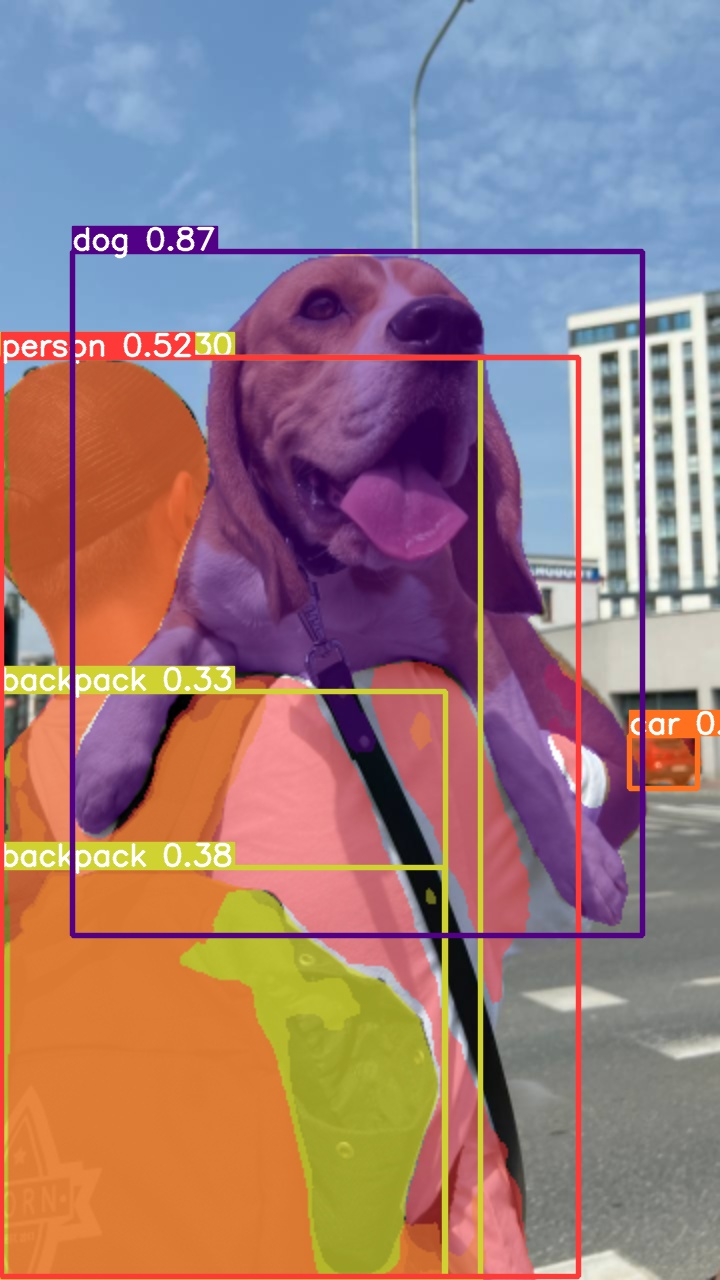

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

## Preparing a custom dataset (Coral Seg)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow --quiet --use-deprecated=legacy-resolver

from roboflow import Roboflow
rf = Roboflow(api_key="COwTGuKIpvzon2O8MJI4")
project = rf.workspace("tugas-akhir-c3gmk").project("coral-segmentation-1")
dataset = project.version(11).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`


# YOLOv8 Medium Preprocess (YOLOv8m-Pp)

## Model Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=25 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Coral-Segmentation-1-11/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml  events.out.tfevents.1709167495.38bdb5a909c2.943.0  weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/segment/train/results.png'

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch1_pred.jpg', width=600)

## Validate Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-2/test/images/frame_1723_jpg.rf.3aa7085dd76f9a775040e778a95779b2.jpg save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-2/test/images/frame_1466_jpg.rf.26faca269b7238e06af393c66b7eaf98.jpg save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-2/test/images/frame_1811_jpg.rf.6356025d051adfc6eec59df86bffd388.jpg save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-2/test/images/frame_3426_jpg.rf.f3539efebb70202bd74b2b524935b3db.jpg save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Yolov8mPreprocess/runs/segment/train/weights/best.pt conf=0.25 source={HOME}/datasets/Coral-Segmentation-1-2/test/images/image_75_jpg.rf.b9fdadfc04a43e563967bab2b67d729d.jpg save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict5/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/coraltest.mp4 save=true

## Save model



In [ ]:
!zip -r /content/Yolov8mprerocessruns.zip /content/runs

In [ ]:
from google.colab import files
files.download("/content/Yolov8mprerocessruns.zip")